In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
def generate_dataset(n_samples=1000, seq_length=10):
    X = np.random.randint(0, 2, size=(n_samples, seq_length, 1))
    y = np.sum(X, axis=1) >= seq_length // 2
    return X, y.astype(int)

X, y = generate_dataset()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [3]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
20/20 [==============================] - 3s 35ms/step - loss: 0.6128 - accuracy: 0.6281 - val_loss: 0.5951 - val_accuracy: 0.5938
Epoch 2/20
20/20 [==============================] - 0s 8ms/step - loss: 0.5412 - accuracy: 0.6359 - val_loss: 0.5142 - val_accuracy: 0.6000
Epoch 3/20
20/20 [==============================] - 0s 8ms/step - loss: 0.4508 - accuracy: 0.7016 - val_loss: 0.3802 - val_accuracy: 0.8500
Epoch 4/20
20/20 [==============================] - 0s 8ms/step - loss: 0.3888 - accuracy: 0.8766 - val_loss: 0.3345 - val_accuracy: 0.8938
Epoch 5/20
20/20 [==============================] - 0s 8ms/step - loss: 0.3927 - accuracy: 0.8844 - val_loss: 0.3312 - val_accuracy: 0.8750
Epoch 6/20
20/20 [==============================] - 0s 7ms/step - loss: 0.3349 - accuracy: 0.8703 - val_loss: 0.2693 - val_accuracy: 0.8875
Epoch 7/20
20/20 [==============================] - 0s 8ms/step - loss: 0.2880 - accuracy: 0.8766 - val_loss: 0.2380 - val_accuracy: 0.9312
Epoch 8/20
20/20 [=

In [4]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)


7/7 [==============================] - 1s 4ms/step - loss: 0.0657 - accuracy: 1.0000


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_binary)


7/7 [==============================] - 0s 4ms/step


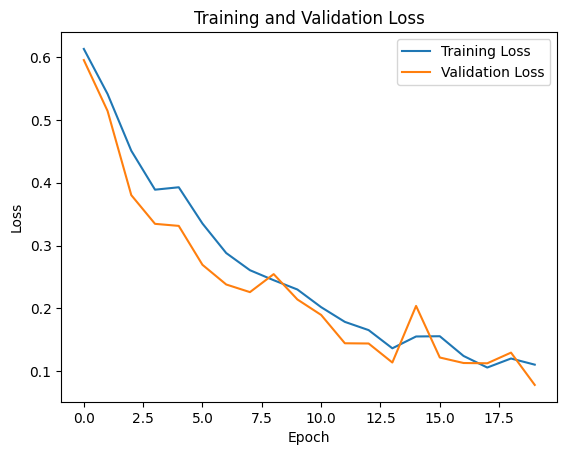

In [6]:
# Training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

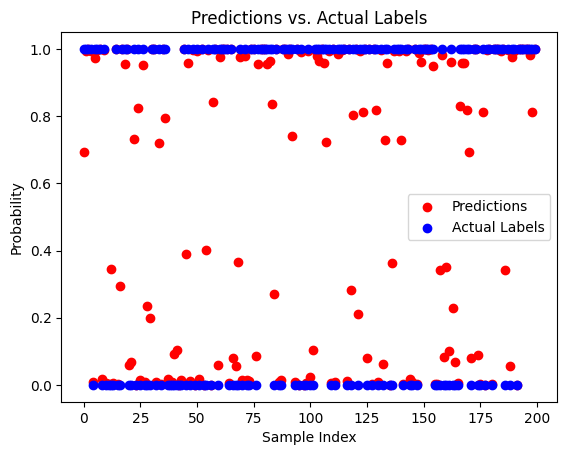

In [7]:
# Predictions vs. Actual Labels
plt.scatter(range(len(y_pred)), y_pred, c='r', label='Predictions')
plt.scatter(range(len(y_test)), y_test, c='b', label='Actual Labels')
plt.xlabel('Sample Index')
plt.ylabel('Probability')
plt.legend()
plt.title('Predictions vs. Actual Labels')
plt.show()

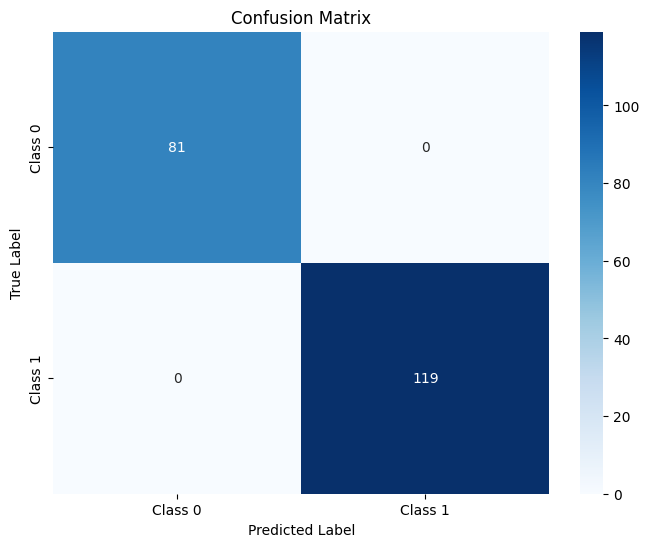

In [15]:
import seaborn as sns

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


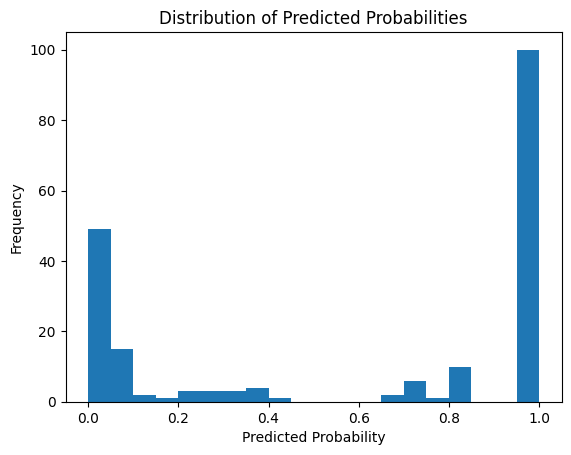

In [9]:
# Distribution of Predicted Probabilities
plt.hist(y_pred, bins=20)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()